In [23]:
# Comment déduire qu'elle type de client est succeptible d'acheter un produit ?

In [24]:
#Importer les bibliothèques nécessaires
import warnings
warnings.filterwarnings("ignore")

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [26]:
#Lire la dataset
MC=pd.read_csv("D:/Travail/Mall_Customers.csv")

In [27]:
#afficher la taille de la dataset 
print(MC.size)

1000


In [28]:
#afficher les cinq premières lignes
MC

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
#Afficher la correlation entre les attributs
MC.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Text(0, 0.5, 'Count')

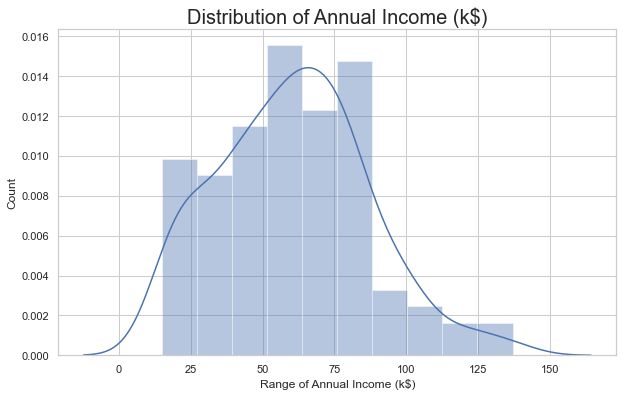

In [30]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(MC['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

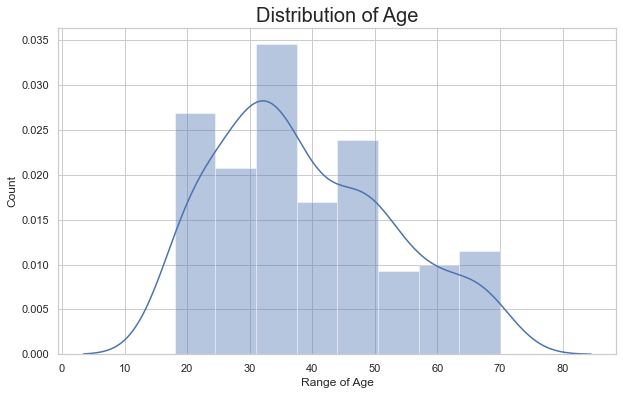

In [31]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(MC['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

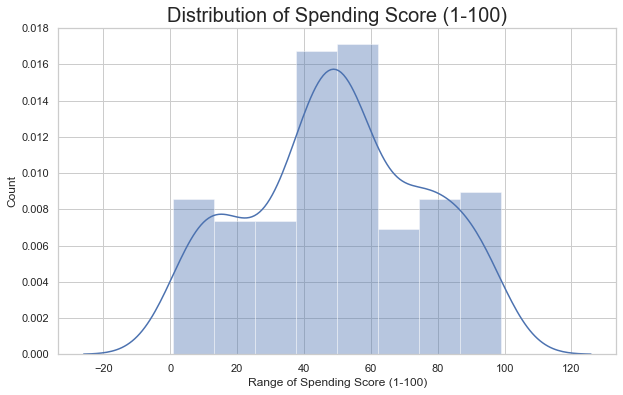

In [32]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(MC['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

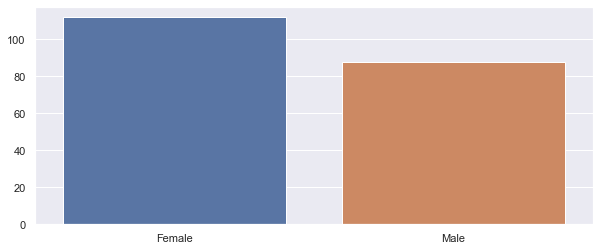

In [33]:
genders = MC.Genre.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [34]:
#transformer la colonne Genre 
sex_dummies= pd.get_dummies(MC.Genre, prefix='sex')
MC=pd.concat([MC, sex_dummies], axis=1)
MC.drop('Genre', axis=1, inplace=True)
MC.drop('sex_Female', axis=1, inplace=True)

In [35]:
MC

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),sex_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [36]:
#importer le modèle KMeans
from sklearn.cluster import KMeans
# Créer le modèle(nombre de clusters = 3)
kmeans = KMeans(n_clusters = 3)
# entrainer le modèle
kmeans.fit(MC)

KMeans(n_clusters=3)

In [37]:
#importer matplotlip pour faire les visualisations
import matplotlib.pyplot as plt

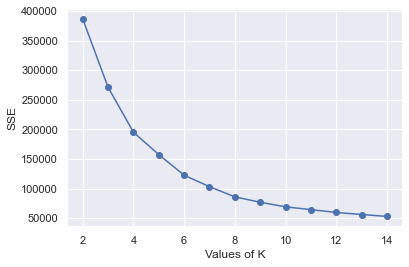

In [38]:
# Les valeurs à tester pour K
Ks = range(2, 15)
# Liste des métriques pour chaque valeur de K
results = []
# Commencer la boucle de test sur les valeurs de K(Nombre de clusters)
for K in Ks:
 model = KMeans(n_clusters = K)
 model.fit(MC)
 results.append(model.inertia_)
# Visualiser les résultats SSE en fonction des valeurs de K 
#Le but c'ést identifier le nombre de K optimale pour la dataset
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("SSE")
plt.show()

On utilise K=5 car il y a une variation lineaire entre 4 et 6

In [41]:
from sklearn.cluster import KMeans
modelKM = KMeans(n_clusters=5)
modelKM.fit(MC)
y_kmeans = modelKM.predict(MC)
centers = modelKM.cluster_centers_

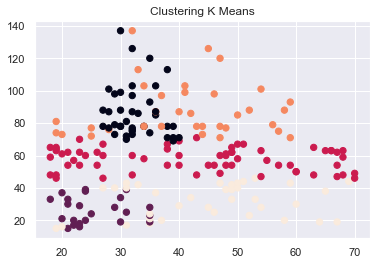

In [42]:
import matplotlib.pyplot as plt 
plt.scatter(MC.iloc[:,1], MC.iloc[:,2], c=y_kmeans, s=40)
plt.title('Clustering K Means')
plt.show()